# Resources
- [Spoken Langauge Identification Dataset](https://www.kaggle.com/datasets/toponowicz/spoken-language-identification)
- [Audio Feature Extration](https://thecleverprogrammer.com/2020/07/28/audio-feature-extraction/)
- [How to read and play audio files using python](https://www.youtube.com/watch?v=VBHQIYAt2XU)
- [PySoundFile](https://pypi.org/project/PySoundFile/)
- [Audio Analysis with Neural Networks](https://reference.wolfram.com/language/tutorial/NeuralNetworksAudioAnalysis.html)
- [Machine Learning for audio classification (TensorFlow)](https://www.youtube.com/watch?v=GxBG4wUWf4w)
- [Machine learning on sound and audio data](https://towardsdatascience.com/machine-learning-on-sound-and-audio-data-3ae03bcf5095#:~:text=CNNs%20for%20Machine%20Learning%20on%20sound%20data&text=To%20do%20Machine%20Learning%20on,being%20performant%20on%20image%20data.)

In [125]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pickle as pkl
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tqdm import tqdm

# # make sure ffmpeg is installed as backend.
# !apt install -y ffmpeg

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [126]:
song, sr = librosa.load('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages/en/en_f_5dff2b7b319207972450f91d569b5a16.fragment1.flac', duration=29)
song

array([-0.20513916, -0.18045044, -0.13726807, ..., -0.04049683,
       -0.0329895 , -0.02993774], dtype=float32)

In [127]:
chroma_stft = librosa.feature.chroma_stft(y=song, sr=sr)
print(chroma_stft.mean())
chroma_stft.var()

0.35445514


0.10409802

In [128]:
rms = librosa.feature.rms(y=song)
print(rms.mean())
rms.var()

0.029683076


0.0006132927

In [129]:
spectral_centroid = librosa.feature.spectral_centroid(y=song, sr=sr)
print(spectral_centroid.mean())
spectral_centroid.var()

2417.911880928743


2635598.949525953

In [130]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=song, sr=sr)
print(spectral_bandwidth.mean())
spectral_bandwidth.var()

2139.6858004485557


311017.3294029294

In [131]:
rolloff = librosa.feature.spectral_rolloff(y=song, sr=sr)
print(rolloff.mean())
rolloff.var()

4372.664123676769


5845567.752239284

In [132]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=song)
print(zero_crossing_rate.mean())
zero_crossing_rate.var()

0.15091515915023201


0.022208585332070558

In [133]:
harmony = librosa.effects.harmonic(y=song)
print(harmony.mean())
harmony.var()

-5.121918e-06


0.0006331776

In [134]:
perceptr = librosa.perceptual_weighting(S=song, frequencies=sr)
print(perceptr.mean())
perceptr.var()

-65.40669246951526


987.198074365927

In [135]:
tempo = librosa.beat.tempo(y=song, sr=sr)
print(tempo.mean())
tempo.var()

112.34714673913044


0.0

In [136]:
mfcc = librosa.feature.mfcc(y=song, sr=sr, n_mfcc=20)
print(mfcc.mean())
mfcc.var()

-16.42174


7517.637

In [137]:
for i in range(len(mfcc)):
    print(f'mfcc{i}_mean', mfcc[i].mean())
    print(f'mfcc{i}_var', mfcc[i].var())

mfcc0_mean -358.26782
mfcc0_var 10724.987
mfcc1_mean 80.41173
mfcc1_var 3321.4373
mfcc2_mean 4.6486173
mfcc2_var 1001.14435
mfcc3_mean 27.914705
mfcc3_var 916.9654
mfcc4_mean 1.139863
mfcc4_var 534.6274
mfcc5_mean 2.7209053
mfcc5_var 224.52853
mfcc6_mean -19.166283
mfcc6_var 401.20526
mfcc7_mean -7.111193
mfcc7_var 254.16063
mfcc8_mean -17.754494
mfcc8_var 239.41743
mfcc9_mean 0.0558859
mfcc9_var 248.98627
mfcc10_mean -8.190784
mfcc10_var 160.61281
mfcc11_mean -4.991223
mfcc11_var 103.54585
mfcc12_mean -17.571215
mfcc12_var 146.82814
mfcc13_mean 5.476569
mfcc13_var 96.05496
mfcc14_mean -4.320021
mfcc14_var 80.292206
mfcc15_mean 1.1545432
mfcc15_var 74.283356
mfcc16_mean -8.95121
mfcc16_var 87.294624
mfcc17_mean 1.1445259
mfcc17_var 47.555813
mfcc18_mean -7.7648363
mfcc18_var 64.69145
mfcc19_mean 0.9869073
mfcc19_var 59.618614


In [138]:
# Dataset location
SOURCE_PATH = '/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages'

# Sampling rate.
sr = 22050

# Let's make sure all files have the same amount of samples and pick a duration right under 10 seconds.
TOTAL_SAMPLES = 10 * sr

# The dataset contains 999 files. Lets make it bigger. 
# X amount of slices => X times more training examples.
NUM_SLICES = 1
SAMPLES_PER_SLICE = int(TOTAL_SAMPLES / NUM_SLICES)

In [139]:
columns = list(pd.read_csv('/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/Data/features_3_sec.csv').columns)

In [148]:
SpokenLanguageFeatures = pd.DataFrame(columns=columns)
SpokenLanguageFeatures

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label


In [ ]:
for i, (dirpath, dirnames, filenames) in enumerate(os.walk(SOURCE_PATH)):
    print(i)
    label = dirpath[-2:]
    for file in tqdm(filenames):
        if file == '.DS_Store':
                continue
        song, sr = librosa.load(os.path.join(dirpath, file), duration=10)
        for s in range(NUM_SLICES):
            start_sample = SAMPLES_PER_SLICE * s
            end_sample = start_sample + SAMPLES_PER_SLICE
            chroma_stft = librosa.feature.chroma_stft(y=song, sr=sr)
            rms = librosa.feature.rms(y=song)
            spectral_centroid = librosa.feature.spectral_centroid(y=song, sr=sr)
            spectral_bandwidth = librosa.feature.spectral_bandwidth(y=song, sr=sr)
            rolloff = librosa.feature.spectral_rolloff(y=song, sr=sr)
            zero_crossing_rate = librosa.feature.zero_crossing_rate(y=song)
            harmony = librosa.effects.harmonic(y=song)
            perceptr = librosa.perceptual_weighting(S=song, frequencies=sr)
            tempo = librosa.beat.tempo(y=song, sr=sr)
            mfcc = librosa.feature.mfcc(y=song[start_sample:end_sample], sr=sr, n_mfcc=20)
            newRow = []
            newRow.append(file)
            newRow.append(len(song))
            newRow.append(chroma_stft.mean())
            newRow.append(chroma_stft.var())
            newRow.append(rms.mean())
            newRow.append(rms.var())
            newRow.append(spectral_centroid.mean())
            newRow.append(spectral_centroid.var())
            newRow.append(spectral_bandwidth.mean())
            newRow.append(spectral_bandwidth.var())
            newRow.append(rolloff.mean())
            newRow.append(rolloff.var())
            newRow.append(zero_crossing_rate.mean())
            newRow.append(zero_crossing_rate.var())
            newRow.append(harmony.mean())
            newRow.append(harmony.var())
            newRow.append(perceptr.mean())
            newRow.append(perceptr.var())
            newRow.append(tempo)
            for i in range(len(mfcc)):
                newRow.append(mfcc[i].mean())
                newRow.append(mfcc[i].var())
            newRow.append(label)
            SpokenLanguageFeatures.loc[len(SpokenLanguageFeatures)] = newRow

0


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3030.57it/s]


1


 50%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                                                      | 12366/24540 [1:33:22<1:36:43,  2.10it/s]

In [151]:
SpokenLanguageFeatures

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment...,220500,0.388578,0.111446,0.028154,0.000842,2176.312631,2.007319e+06,1962.468734,389856.995085,...,57.310310,-3.479776,36.210308,-3.376676,39.213684,-5.111793,31.482708,-4.221928,39.575729,de
1,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,220500,0.398073,0.117118,0.027246,0.000667,2866.851529,3.208489e+06,2262.000962,752405.614694,...,117.164734,1.452445,64.530228,-7.441908,104.682343,-3.972377,70.987366,-0.828929,81.172882,de
2,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,220500,0.441547,0.106831,0.030638,0.000097,1600.757459,5.402005e+05,2329.336534,288142.485572,...,61.579376,-0.289222,63.192631,4.488115,57.893620,3.419518,69.903725,-3.388428,64.794807,de
3,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,220500,0.382505,0.100872,0.037158,0.000680,1903.513831,1.829931e+06,1913.491233,363454.417653,...,132.529602,-6.649984,127.629494,-2.075275,113.451996,-3.569527,101.393654,1.167919,60.406105,de
4,de_f_9bd3b58fe6f75dc40e85021914b4b06a.fragment...,220500,0.462448,0.084383,0.022036,0.000068,1791.538456,2.708433e+05,1934.635382,127737.145151,...,26.417906,-10.194945,19.064035,-5.991244,18.953880,-9.021425,19.318649,-5.630632,17.796896,de
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,en_f_17211c49a9b2967b57cffaccf0d5b565.fragment...,220500,0.335345,0.102557,0.035246,0.000886,2490.140291,2.322328e+06,2243.492513,366877.992614,...,70.158165,-11.420835,108.551155,5.079531,71.808273,-6.818059,72.833534,-1.592033,50.181046,en
73640,en_m_6876763e37d7a41d6f53f4322a72b0d2.fragment...,220500,0.296054,0.099861,0.109069,0.007259,1870.770849,1.281839e+06,1911.014300,260163.030230,...,96.391113,-0.992750,76.397461,-1.364209,80.672829,-4.526569,56.807270,-2.530952,60.745323,en
73641,en_f_058b70233667e1b64506dddf9f9d6b46.fragment...,220500,0.469898,0.100518,0.028094,0.000264,2071.391322,1.136434e+06,2213.187852,324424.032244,...,43.114315,3.321433,35.962936,0.257781,35.905510,-2.002538,39.996109,2.211495,39.511120,en
73642,en_f_058b70233667e1b64506dddf9f9d6b46.fragment...,220500,0.410885,0.094543,0.029247,0.000232,1877.611338,4.440657e+05,1941.625809,170363.138227,...,23.177794,-7.671535,31.275986,-8.151192,26.672415,-10.191714,26.541098,-6.701851,30.897526,en


In [189]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**IMPORTING LIBRARIES**

In [190]:
import warnings
warnings.simplefilter("ignore", UserWarning)

!pip install xgboost -U
!pip install librosa -U
!pip install hyperopt

import os
from tqdm import tqdm
import pickle
import scipy
import sys
import pandas as pd
import numpy as np
import IPython
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import librosa #Python package for music & audio files
import librosa.display
import librosa.display as lplt

from tensorflow import keras
from keras.models import Sequential
from IPython.display import Audio
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.feature_selection import RFECV,mutual_info_regression
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe


**LOADING & PREPROCESSING THE DATA**

In [191]:
#Reading the csv file
final_data = pd.read_csv("SpokenLanguageFeaturesAugmented.csv", index_col=False)

In [192]:
final_data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment...,220500,0.388578,0.111446,0.028154,0.000842,2176.312631,2.007319e+06,1962.468734,389856.995085,...,57.310310,-3.479776,36.210308,-3.376676,39.213684,-5.111793,31.482708,-4.221928,39.575730,de
1,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,220500,0.398073,0.117118,0.027246,0.000667,2866.851529,3.208489e+06,2262.000962,752405.614694,...,117.164734,1.452445,64.530230,-7.441908,104.682340,-3.972377,70.987366,-0.828929,81.172880,de
2,de_f_bce247cbc0fe8ff27de25b3adf154d92.fragment...,220500,0.441547,0.106831,0.030638,0.000097,1600.757459,5.402005e+05,2329.336534,288142.485572,...,61.579376,-0.289222,63.192630,4.488115,57.893620,3.419519,69.903725,-3.388428,64.794810,de
3,de_m_0345d503166fbcb125b6e10e2e804443.fragment...,220500,0.382505,0.100872,0.037158,0.000680,1903.513831,1.829931e+06,1913.491233,363454.417653,...,132.529600,-6.649984,127.629490,-2.075275,113.451996,-3.569527,101.393654,1.167919,60.406105,de
4,de_f_9bd3b58fe6f75dc40e85021914b4b06a.fragment...,220500,0.462448,0.084383,0.022036,0.000068,1791.538456,2.708433e+05,1934.635382,127737.145151,...,26.417906,-10.194945,19.064035,-5.991244,18.953880,-9.021425,19.318650,-5.630632,17.796896,de


In [193]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73644 entries, 0 to 73643
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 73644 non-null  object 
 1   length                   73644 non-null  int64  
 2   chroma_stft_mean         73644 non-null  float64
 3   chroma_stft_var          73644 non-null  float64
 4   rms_mean                 73644 non-null  float64
 5   rms_var                  73644 non-null  float64
 6   spectral_centroid_mean   73644 non-null  float64
 7   spectral_centroid_var    73644 non-null  float64
 8   spectral_bandwidth_mean  73644 non-null  float64
 9   spectral_bandwidth_var   73644 non-null  float64
 10  rolloff_mean             73644 non-null  float64
 11  rolloff_var              73644 non-null  float64
 12  zero_crossing_rate_mean  73644 non-null  float64
 13  zero_crossing_rate_var   73644 non-null  float64
 14  harmony_mean          

In [194]:
final_data.shape

(73644, 60)

In [195]:
final_data.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                       object
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [196]:
final_data = final_data.drop(labels='filename',axis=1)

In [197]:
#audio file
audio = "/Users/josue/Desktop/School/Fall2022/MachineLearning/CS334/FinalProject/SpokenLanguageAudio/Languages/de/de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.flac"
#Load & decode the audio as a time series, where sr represents the sampling rate
data , sr = librosa.load(audio)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [198]:
librosa.load(audio, sr=45600)

(array([ 0.0152182 , -0.00151955, -0.01577934, ...,  0.00072447,
         0.00074157,  0.00057989], dtype=float32),
 45600)

In [199]:
#Playing the audio within the notebook
IPython.display.Audio(data, rate=sr)

**AUDIO VISUALIZATION**

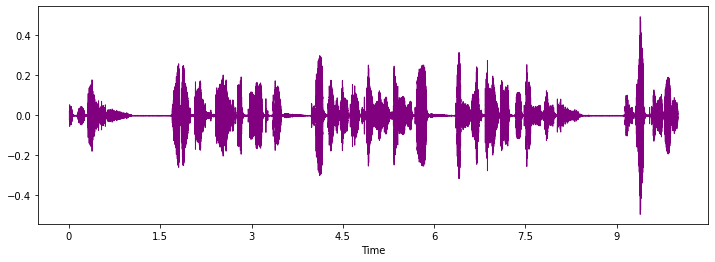

In [200]:
#Plotting the raw wave file to quickly scan the audio data & contrast which genres might be more similar.

plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color = "Purple")
plt.show()

# Harmony

Extract harmonic elements from an audio time-series.

In [201]:
harmony = librosa.effects.harmonic(y=song)
harmony

array([-3.4225701e-05, -5.7261335e-05, -3.3964217e-05, ...,
        3.2142122e-04,  3.7508371e-04,  4.2679653e-04], dtype=float32)

# RMS
Compute root-mean-square (RMS) value for each frame, either from the audio samples y

In [202]:
rms = librosa.feature.rms(y=song)
rms

array([[3.23897752e-04, 6.79638644e-04, 8.80299485e-04, 9.50360263e-04,
        3.95133905e-02, 8.15801993e-02, 1.13307774e-01, 1.34980023e-01,
        1.48024678e-01, 1.33683279e-01, 1.12989016e-01, 1.08558849e-01,
        1.06692709e-01, 1.04209639e-01, 9.89878252e-02, 7.35339448e-02,
        3.45556661e-02, 8.73618126e-02, 1.30639270e-01, 1.63289160e-01,
        1.81392804e-01, 1.82062164e-01, 1.76283285e-01, 1.67024270e-01,
        1.59617051e-01, 1.43673211e-01, 1.15393236e-01, 8.30211043e-02,
        4.93543632e-02, 7.80064706e-03, 1.41949300e-02, 6.91810995e-02,
        1.07095465e-01, 1.37036964e-01, 1.58040598e-01, 1.59382254e-01,
        1.45156577e-01, 1.27676755e-01, 1.28617913e-01, 1.35532856e-01,
        1.43209234e-01, 1.51298925e-01, 1.43411338e-01, 1.36805922e-01,
        1.39395505e-01, 1.38459414e-01, 1.35172054e-01, 1.25750020e-01,
        1.09373495e-01, 8.61382112e-02, 6.37045354e-02, 3.97207551e-02,
        1.83209442e-02, 2.98847929e-02, 5.97400256e-02, 7.440419

# Spectrogram
The STFT represents a signal in the time-frequency domain by computing discrete Fourier transforms (DFT) over short overlapping windows.

The Fourier Transform takes a time-based pattern, measures every possible cycle, and returns the overall "cycle recipe" (the amplitude, offset, & rotation speed for every cycle that was found).

Using a spectrogram we represent the noise or sound intensity of audio data with respect to frequency and time. On the premise of those frequency values we assign a color range, with lower values as a brighter color and high frequency values as a darker color. A spectrogram may be a sort of heatmap.

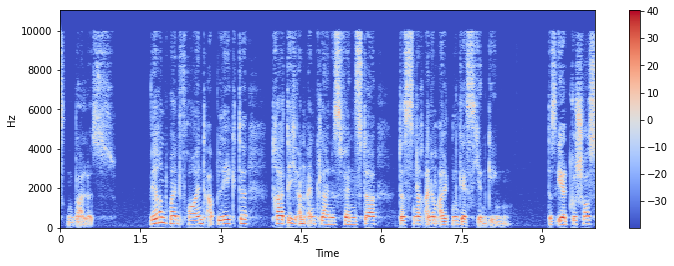

In [203]:
stft = librosa.stft(data)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Spectral Centroid
During any sound emission we may see our complete sound/audio data focused on a particular point or mean. This is called the centroid of the wave. In other words, the center mass of audio data.

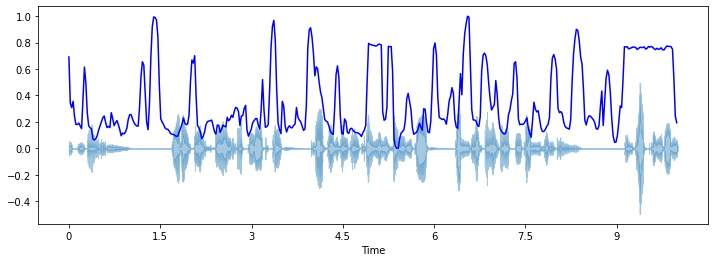

In [204]:
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)
spectral_centroids = librosa.feature.spectral_centroid(y=song, sr=sr)[0]
plt.figure(figsize= (12,4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(data, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

# Spectral Rolloff

In this method we try to analyze the waveform in which our frequency drops suddenly from high to 0. In the language of calculus we can say that there is a non-differentiability point in our waveform.

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/1474135414.py:5: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]


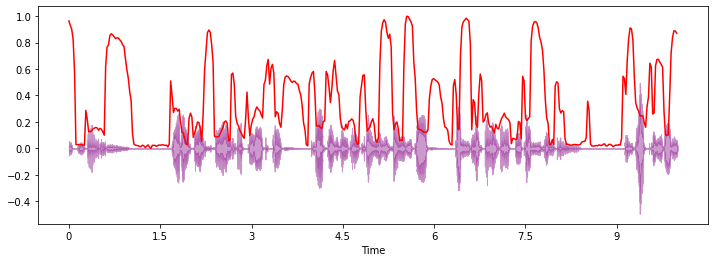

In [205]:
import sklearn
def normalize(x, axis = 0):
    return sklearn.preprocessing.minmax_scale(x, axis = axis)
#computing the rolloff frequency for each frame in a signal
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, sr = sr, alpha = 0.4, color='Purple')
frames = range(len(spectral_rolloff))
t = librosa.frames_to_time(frames)
plt.plot(t, normalize(spectral_rolloff), color = 'r')

# Chroma
Chroma feature or chromagram closely relates to the twelve different pitch classes.
Chroma features capture harmonic & melodic characteristics of music while being robust to changes.

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/1703756062.py:1: FutureWarning: Pass y=[ 0.01663208 -0.01715088  0.00863647 ...  0.00540161  0.00170898
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(data, sr=sr)


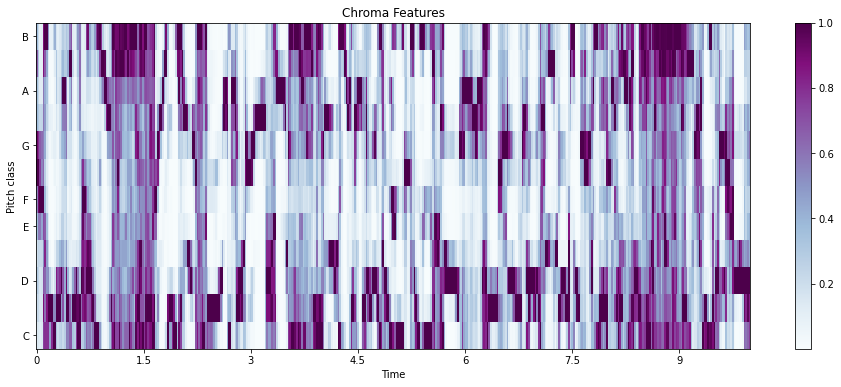

In [206]:
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='BuPu')
plt.colorbar()
plt.title("Chroma Features")
plt.show()

# Spectral Bandwidth
Bandwidth is defined as the change or difference in two frequencies, like high and low frequencies.

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/2437640335.py:1: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr)[0]
/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/2437640335.py:2: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr, p = 3)[0]
/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/2437640335.py:3: FutureWarning: Pass y=[ 0.02663208 -0.00715088  0.01863647 ...  0.01540161  0.01170898
  0.01082397] as keyword args. From version 0.10 passing these as positional arguments will re

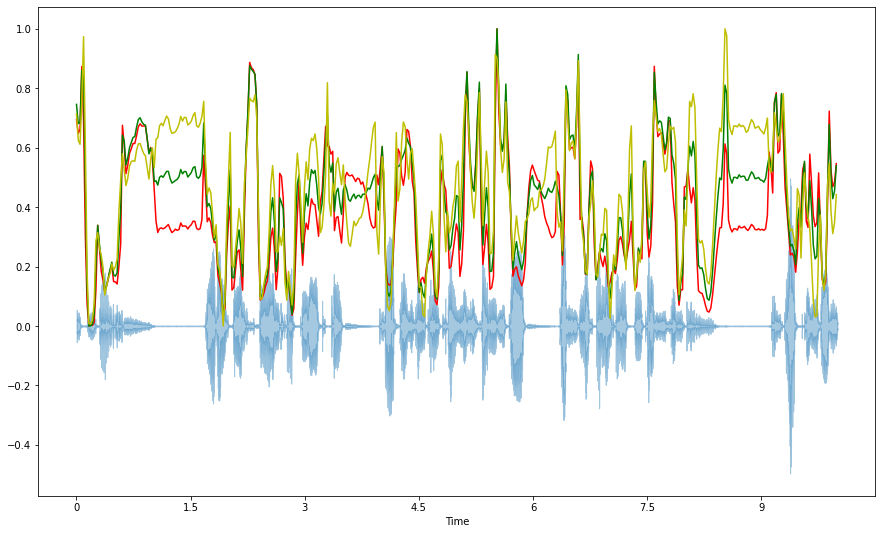

In [207]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr, p = 3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(data + 0.01, sr = sr, p = 4)[0]
plt.figure(figsize = (15, 9))
librosa.display.waveshow(data, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color = 'r')
plt.plot(t, normalize(spectral_bandwidth_3), color = 'g')
plt.plot(t, normalize(spectral_bandwidth_4), color = 'y')

# Melspectrogram

Compute a mel-scaled spectrogram.

If a spectrogram input S is provided, then it is mapped directly onto the mel basis by mel_f.dot(S).

If a time-series input y, sr is provided, then its magnitude spectrogram S is first computed, and then mapped onto the mel scale by mel_f.dot(S**power).

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/2395590258.py:1: FutureWarning: Pass y=[ 0.01663208 -0.01715088  0.00863647 ...  0.00540161  0.00170898
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  melspectrogram = librosa.feature.melspectrogram(data, sr=sr)


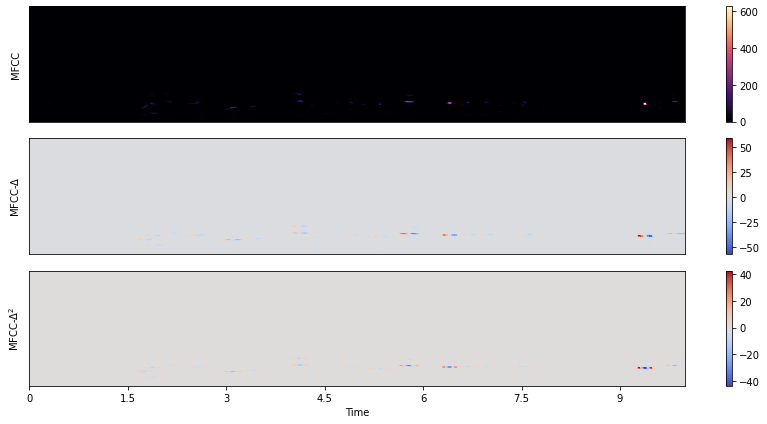

In [208]:
melspectrogram = librosa.feature.melspectrogram(data, sr=sr)
melspectrogram

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(melspectrogram)
delta2_mfcc = librosa.feature.delta(melspectrogram, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(melspectrogram)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Perceptual Weighting
Perceptual weighting of a power spectrogram:

In [209]:
perceptr = librosa.perceptual_weighting(S=song, frequencies=sr)
perceptr

array([[-95.13148027, -95.13148027, -95.13148027, ..., -37.37895113,
        -36.22501665, -36.95930391]])

# MFCC
In sound processing, the mel-frequency cepstrum (MFC) is a representation of the short-term power spectrum of a sound, based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency.

Mel-frequency cepstral coefficients (MFCCs) are coefficients that collectively make up an MFC.[1] They are derived from a type of cepstral representation of the audio clip (a nonlinear "spectrum-of-a-spectrum"). The difference between the cepstrum and the mel-frequency cepstrum is that in the MFC, the frequency bands are equally spaced on the mel scale, which approximates the human auditory system's response more closely than the linearly-spaced frequency bands used in the normal spectrum. This frequency warping can allow for better representation of sound, for example, in audio compression that might potentially reduce the transmission bandwidth and the storage requirements of audio signals.

/var/folders/3n/344lt8m52hgg43g5j4q6rtwh0000gp/T/ipykernel_62564/1415191255.py:2: FutureWarning: Pass y=[ 0.01663208 -0.01715088  0.00863647 ...  0.00540161  0.00170898
  0.00082397] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(data, n_mfcc=20)


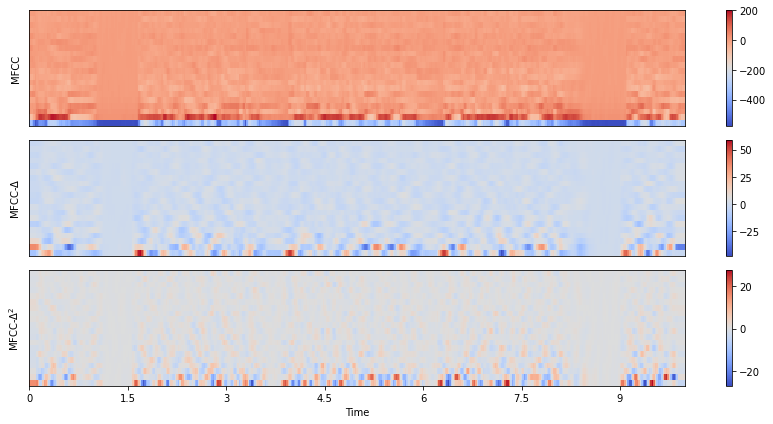

In [210]:
# Next, we'll extract the first 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc = librosa.feature.mfcc(data, n_mfcc=20)

# Padding first and second deltas
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# Stacking these 3 tables together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

# Zero Crossing Rate
The rate at which zero-crossings occur is a simple measure of the frequency content of a signal.
Zero crossing is said to occur if successive samples have different algebric signs.

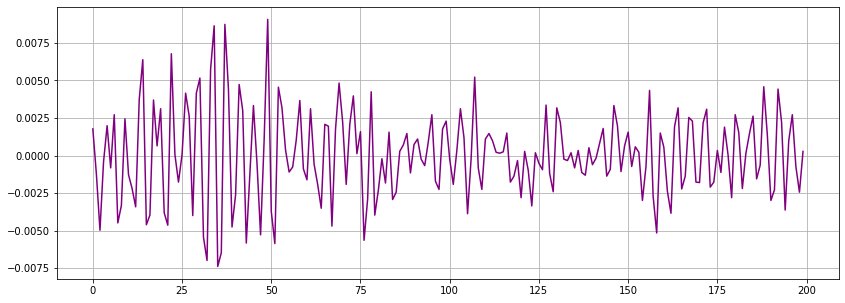

In [211]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color='Purple')
plt.grid()

In [212]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print("The number of zero crossings is:",sum(zero_cross_rate))

The number of zero crossings is: 104


**EXTRACTING AND SCALING THE FEATURES**

In [213]:
#To convert categorical data into model-understandable numerica data
class_list = final_data.iloc[:, -1]
convertor = LabelEncoder()

In [214]:
#Fitting the label encoder & return encoded labels
y = convertor.fit_transform(class_list)

In [215]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [216]:
final_data.iloc[:, :-1]

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,220500,0.388578,0.111446,0.028154,0.000842,2176.312631,2.007319e+06,1962.468734,389856.995085,4040.797994,...,1.325755,57.310310,-3.479776,36.210308,-3.376676,39.213684,-5.111793,31.482708,-4.221928,39.575730
1,220500,0.398073,0.117118,0.027246,0.000667,2866.851529,3.208489e+06,2262.000962,752405.614694,5262.644898,...,-10.070031,117.164734,1.452445,64.530230,-7.441908,104.682340,-3.972377,70.987366,-0.828929,81.172880
2,220500,0.441547,0.106831,0.030638,0.000097,1600.757459,5.402005e+05,2329.336534,288142.485572,3751.473680,...,-2.171421,61.579376,-0.289222,63.192630,4.488115,57.893620,3.419519,69.903725,-3.388428,64.794810
3,220500,0.382505,0.100872,0.037158,0.000680,1903.513831,1.829931e+06,1913.491233,363454.417653,3506.015149,...,11.934330,132.529600,-6.649984,127.629490,-2.075275,113.451996,-3.569527,101.393654,1.167919,60.406105
4,220500,0.462448,0.084383,0.022036,0.000068,1791.538456,2.708433e+05,1934.635382,127737.145151,3364.550498,...,-5.049705,26.417906,-10.194945,19.064035,-5.991244,18.953880,-9.021425,19.318650,-5.630632,17.796896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73639,220500,0.335345,0.102557,0.035246,0.000886,2490.140291,2.322328e+06,2243.492513,366877.992614,4611.552780,...,0.008795,70.158165,-11.420835,108.551155,5.079531,71.808270,-6.818059,72.833534,-1.592033,50.181046
73640,220500,0.296054,0.099861,0.109069,0.007259,1870.770849,1.281839e+06,1911.014300,260163.030230,3315.688613,...,-7.017151,96.391110,-0.992750,76.397460,-1.364209,80.672830,-4.526569,56.807270,-2.530952,60.745323
73641,220500,0.469898,0.100518,0.028094,0.000264,2071.391322,1.136434e+06,2213.187852,324424.032244,4096.579482,...,3.023930,43.114315,3.321433,35.962936,0.257781,35.905510,-2.002538,39.996110,2.211495,39.511120
73642,220500,0.410885,0.094543,0.029247,0.000232,1877.611338,4.440657e+05,1941.625809,170363.138227,3481.534245,...,-8.124178,23.177794,-7.671535,31.275986,-8.151192,26.672415,-10.191714,26.541098,-6.701851,30.897526


In [217]:
final_data = final_data.drop(columns='tempo')

In [218]:
#Standard scaler is used to standardize features & look like standard normally distributed data
fit = StandardScaler()
X = fit.fit_transform(np.array(final_data.iloc[:, :-1], dtype = float))

**SPLIT THE DATA INTO TRAINING DATA & TEST DATA**

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [220]:
len(y_train)

49341

In [221]:
len(y_test)

24303

In sparse categorical cross-entropy , truth labels are integer encoded, for example, [1] , [2] and [3] for 3-class problem

In [222]:
#The loss is calculated using sparse_categorical_crossentropy function
def trainModel(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                   metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, 
                     batch_size=batch_size)

In [223]:
#Plotting the curves
def plotValidate(history):
    print("Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()
    

<AxesSubplot:>

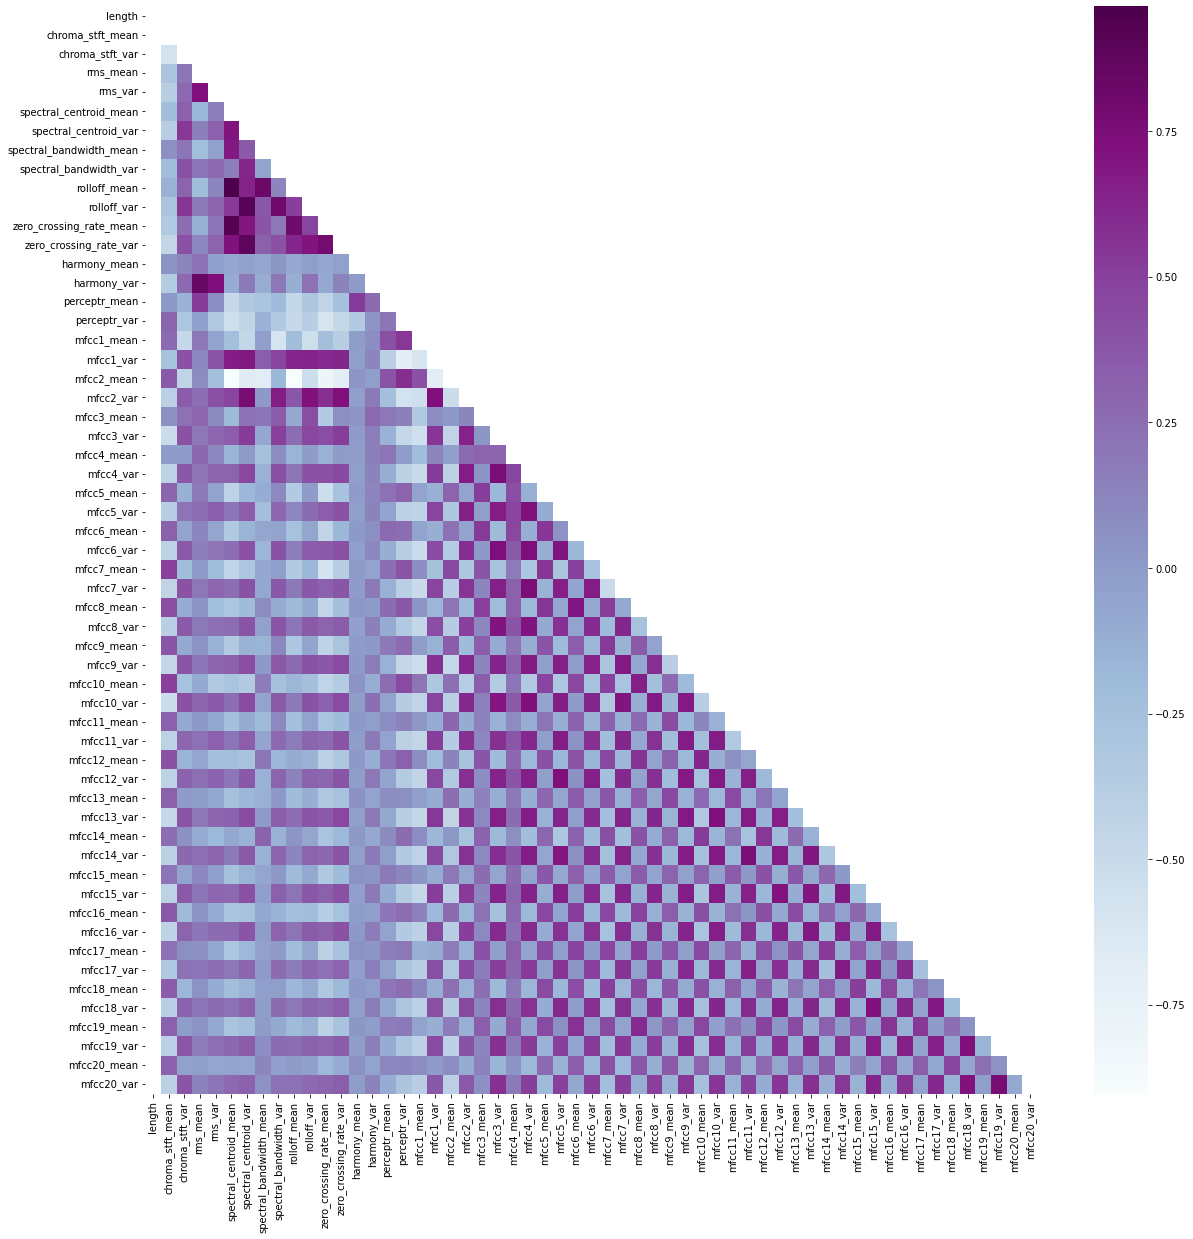

In [224]:
#correlation
corr = final_data.corr()
#Creation of a mask for the heatmap
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap="BuPu")

**XGBOOST**

* XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

* XGBClassifier is a scikit-learn API compatible class for classification.

In [225]:
model = XGBClassifier(n_estimators=1000)
model.fit(X_train,y_train,eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=1000,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)

In [226]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
target_names = sorted(set(y))

print(f'Training accuracy: {accuracy_score(y_train,y_pred_train)}')
print(f'Training:\n {classification_report(y_train, y_pred_train, labels=target_names)}')
print(f'Testing accuracy: {accuracy_score(y_test,y_pred_test)}')
print(f'Testing:\n {classification_report(y_test, y_pred_test, labels=target_names)}')

Training accuracy: 1.0
Training:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     16615
           1       1.00      1.00      1.00     16396
           2       1.00      1.00      1.00     16330

    accuracy                           1.00     49341
   macro avg       1.00      1.00      1.00     49341
weighted avg       1.00      1.00      1.00     49341

Testing accuracy: 0.9972842858906308
Testing:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7949
           1       1.00      1.00      1.00      8144
           2       1.00      1.00      1.00      8210

    accuracy                           1.00     24303
   macro avg       1.00      1.00      1.00     24303
weighted avg       1.00      1.00      1.00     24303



<AxesSubplot:>

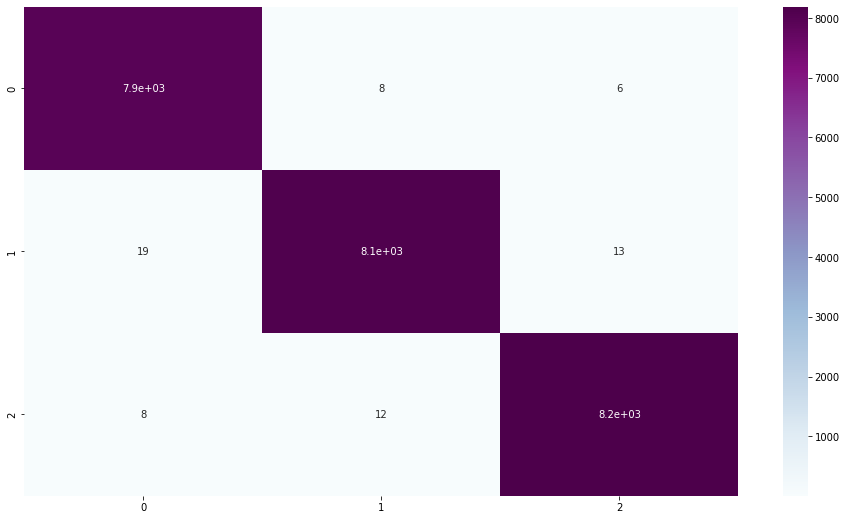

In [227]:
#Confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize = (16, 9))
sns.heatmap(conf_mat,cmap="BuPu", annot=True, xticklabels = target_names, yticklabels = target_names )

**Deep Neural Network (DNN)**

In [228]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(64,activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               29696     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

2022-12-05 12:41:06.843346: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


None
Epoch 1/100
386/386 [==============================] - 3s 4ms/step - loss: 0.4874 - accuracy: 0.7837 - val_loss: 0.1654 - val_accuracy: 0.9380
Epoch 2/100
386/386 [==============================] - 1s 4ms/step - loss: 0.1587 - accuracy: 0.9410 - val_loss: 0.0806 - val_accuracy: 0.9695
Epoch 3/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9639 - val_loss: 0.0367 - val_accuracy: 0.9872
Epoch 4/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0741 - accuracy: 0.9732 - val_loss: 0.0369 - val_accuracy: 0.9863
Epoch 5/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0623 - accuracy: 0.9772 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch 6/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0522 - accuracy: 0.9818 - val_loss: 0.0335 - val_accuracy: 0.9867
Epoch 7/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0448 - accuracy: 0.9845 - val_loss: 0.0207 - val_accuracy: 0

Epoch 58/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 9.4777e-04 - val_accuracy: 0.9998
Epoch 59/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0082 - accuracy: 0.9974 - val_loss: 0.0018 - val_accuracy: 0.9993
Epoch 60/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0105 - accuracy: 0.9966 - val_loss: 0.0018 - val_accuracy: 0.9995
Epoch 61/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0086 - accuracy: 0.9969 - val_loss: 0.0020 - val_accuracy: 0.9993
Epoch 62/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0071 - accuracy: 0.9974 - val_loss: 0.0010 - val_accuracy: 0.9996
Epoch 63/100
386/386 [==============================] - 1s 3ms/step - loss: 0.0099 - accuracy: 0.9967 - val_loss: 0.0039 - val_accuracy: 0.9988
Epoch 64/100
386/386 [==============================] - 1s 4ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.0027 - val_accur

In [229]:
model.predict(X_test)

760/760 [==============================] - 1s 886us/step


array([[1.0000000e+00, 6.7147427e-28, 1.7642065e-27],
       [1.0690433e-09, 1.0000000e+00, 3.1356116e-11],
       [1.0000000e+00, 3.5996369e-25, 2.3987428e-26],
       ...,
       [2.2532046e-18, 1.0000000e+00, 2.3481404e-35],
       [5.9359692e-12, 1.0000000e+00, 1.8711226e-20],
       [1.1275607e-14, 1.2928973e-11, 1.0000000e+00]], dtype=float32)

In [230]:
y_test

array([0, 1, 0, ..., 1, 1, 2])

In [231]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

190/190 [==============================] - 0s 1ms/step - loss: 0.0028 - accuracy: 0.9992
The test loss is : 0.0027712034061551094

The test Accuracy is : 99.9218225479126


Validation Accuracy 0.9998354315757751


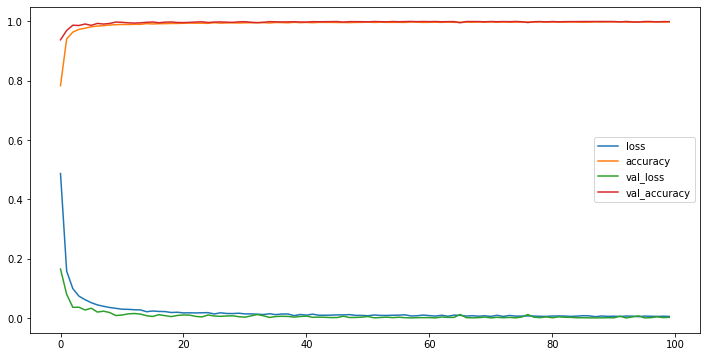

In [232]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [233]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(32, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                1856      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
386/386 [==============================] - 1s 2ms/step - loss: 0.9516 - accuracy: 0.5379 - val_loss: 0.7491 - val_accuracy: 0.6884
Epoch 2/100
386/386 [==============================] - 1s 1ms/step - loss: 0.7128 - accuracy: 0.6887 - val_loss: 0.5873 - val_accuracy: 0.7776
Epoch 3/100
386/386 [====

386/386 [==============================] - 0s 1ms/step - loss: 0.2059 - accuracy: 0.9242 - val_loss: 0.1158 - val_accuracy: 0.9649
Epoch 53/100
386/386 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9241 - val_loss: 0.1133 - val_accuracy: 0.9648
Epoch 54/100
386/386 [==============================] - 0s 1ms/step - loss: 0.2055 - accuracy: 0.9226 - val_loss: 0.1180 - val_accuracy: 0.9624
Epoch 55/100
386/386 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9252 - val_loss: 0.1146 - val_accuracy: 0.9637
Epoch 56/100
386/386 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9246 - val_loss: 0.1123 - val_accuracy: 0.9676
Epoch 57/100
386/386 [==============================] - 0s 1ms/step - loss: 0.1987 - accuracy: 0.9259 - val_loss: 0.1119 - val_accuracy: 0.9653
Epoch 58/100
386/386 [==============================] - 0s 1ms/step - loss: 0.2033 - accuracy: 0.9243 - val_loss: 0.1107 - val_accuracy: 0.9673
Epoch

In [234]:
model.predict(X_test)

760/760 [==============================] - 0s 606us/step


array([[9.9999976e-01, 2.7457327e-07, 2.5606650e-12],
       [2.5797269e-01, 7.4199051e-01, 3.6786263e-05],
       [9.9858946e-01, 2.2628033e-06, 1.4082778e-03],
       ...,
       [7.0207236e-08, 9.9999678e-01, 3.0541005e-06],
       [3.4981989e-03, 9.9647385e-01, 2.7904172e-05],
       [9.7778954e-02, 2.0532268e-01, 6.9689828e-01]], dtype=float32)

In [235]:
y_test

array([0, 1, 0, ..., 1, 1, 2])

In [236]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

190/190 [==============================] - 0s 750us/step - loss: 0.1006 - accuracy: 0.9704
The test loss is : 0.10061982274055481

The test Accuracy is : 97.0374047756195


Validation Accuracy 0.9705797433853149


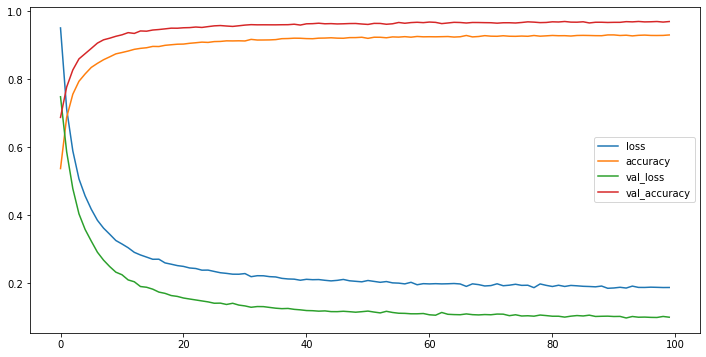

In [237]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [238]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 464       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 3)                 27        
                                                                 
Total params: 563
Trainable params: 563
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
386/386 [==============================

386/386 [==============================] - 0s 1ms/step - loss: 0.6082 - accuracy: 0.7446 - val_loss: 0.4542 - val_accuracy: 0.8394
Epoch 51/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6142 - accuracy: 0.7388 - val_loss: 0.4590 - val_accuracy: 0.8402
Epoch 52/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6130 - accuracy: 0.7390 - val_loss: 0.4580 - val_accuracy: 0.8385
Epoch 53/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6072 - accuracy: 0.7408 - val_loss: 0.4548 - val_accuracy: 0.8420
Epoch 54/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6108 - accuracy: 0.7407 - val_loss: 0.4608 - val_accuracy: 0.8359
Epoch 55/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6089 - accuracy: 0.7413 - val_loss: 0.4566 - val_accuracy: 0.8406
Epoch 56/100
386/386 [==============================] - 0s 1ms/step - loss: 0.6104 - accuracy: 0.7402 - val_loss: 0.4567 - val_accuracy: 0.8417
Epoch

In [239]:
model.predict(X_test)

760/760 [==============================] - 0s 561us/step


array([[9.8348409e-01, 3.7384758e-04, 1.6142009e-02],
       [2.7968815e-01, 4.9810192e-01, 2.2220993e-01],
       [9.7018540e-01, 1.7048714e-03, 2.8109757e-02],
       ...,
       [1.0494207e-02, 9.4067132e-01, 4.8834451e-02],
       [1.7065691e-02, 9.6567065e-01, 1.7263653e-02],
       [3.8683787e-01, 3.4951997e-01, 2.6364219e-01]], dtype=float32)

In [240]:
y_test

array([0, 1, 0, ..., 1, 1, 2])

In [241]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

190/190 [==============================] - 0s 704us/step - loss: 0.4518 - accuracy: 0.8401
The test loss is : 0.45183491706848145

The test Accuracy is : 84.00608897209167


Validation Accuracy 0.8442167639732361


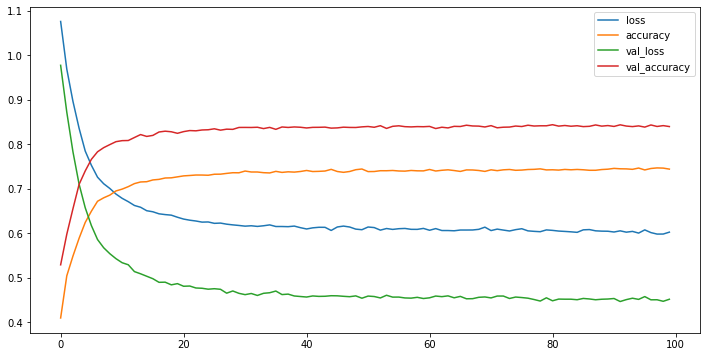

In [242]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)

In [243]:
#Here, we use Adam optimizer to train the model
#All of the hidden layers are using RELU activation function
#Output Layer uses softmax function


model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(8, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(4, activation="relu", input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(3, activation="softmax"),
    
])
print(model.summary())
model_history = trainModel(model=model, epochs=100, optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                928       
                                                                 
 dropout_7 (Dropout)         (None, 16)                0         
                                                                 
 dense_11 (Dense)            (None, 8)                 136       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_13 (Dense)            (None, 4)                

Epoch 47/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6692 - accuracy: 0.7120 - val_loss: 0.5241 - val_accuracy: 0.7927
Epoch 48/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6727 - accuracy: 0.7116 - val_loss: 0.5268 - val_accuracy: 0.7889
Epoch 49/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6652 - accuracy: 0.7165 - val_loss: 0.5289 - val_accuracy: 0.7860
Epoch 50/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6660 - accuracy: 0.7174 - val_loss: 0.5224 - val_accuracy: 0.7904
Epoch 51/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6677 - accuracy: 0.7147 - val_loss: 0.5133 - val_accuracy: 0.7998
Epoch 52/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6651 - accuracy: 0.7178 - val_loss: 0.5260 - val_accuracy: 0.7887
Epoch 53/100
386/386 [==============================] - 1s 1ms/step - loss: 0.6650 - accuracy: 0.7197 - val_loss: 0.5206 - val_accuracy:

In [244]:
model.predict(X_test)

760/760 [==============================] - 1s 621us/step


array([[9.9125612e-01, 5.9521808e-03, 2.7916366e-03],
       [1.5963632e-01, 2.6248392e-01, 5.7787979e-01],
       [9.6662641e-01, 1.8446593e-02, 1.4927049e-02],
       ...,
       [0.0000000e+00, 9.9991107e-01, 8.8922221e-05],
       [0.0000000e+00, 9.9988079e-01, 1.1913713e-04],
       [1.1854627e-01, 2.8165278e-01, 5.9980100e-01]], dtype=float32)

In [245]:
y_test

array([0, 1, 0, ..., 1, 1, 2])

In [246]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, batch_size=128)
print("The test loss is :",test_loss)
print("\nThe test Accuracy is :",test_accuracy*100)

190/190 [==============================] - 0s 741us/step - loss: 0.4870 - accuracy: 0.8143
The test loss is : 0.48696333169937134

The test Accuracy is : 81.43027424812317


Validation Accuracy 0.8227790594100952


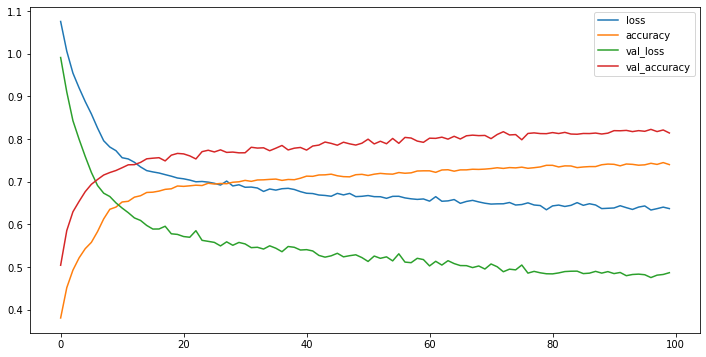

In [247]:
#Plot the loss & accuracy curves for training & validation
plotValidate(model_history)